# Homework w07d03 - Hierarchical clustering

For this exercise we are using the USArrest data which is one of the datasets provided by R, more information can be found on https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html.
It contains data on the rate of arrests for murder, assault and rape per 100000 inhabitants and the percentage of urban population per US state.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from matplotlib import cm

#### 1. Load the dataset from the provided file

In [2]:
df = pd.read_csv('datasets/USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})

In [3]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


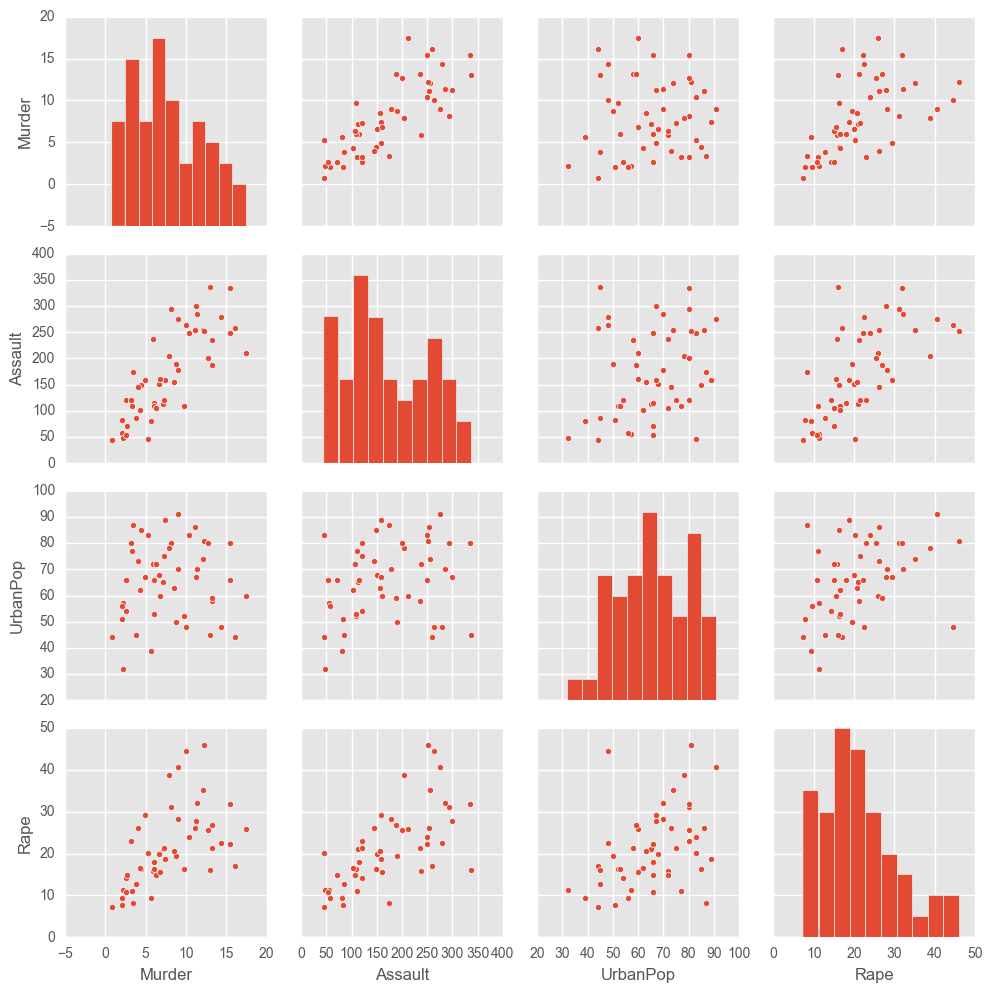

In [5]:
sns.pairplot(df)
plt.show()

#### 2. Use a standard scaler to rescale the data and obtain the principal components

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,1:])

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca,columns=['PC1','PC2'])#,'PC3','PC4'])
df_pca['States'] = df.States

In [8]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [25]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129])

In [9]:
df_pca.head()

,PC1,PC2,States
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


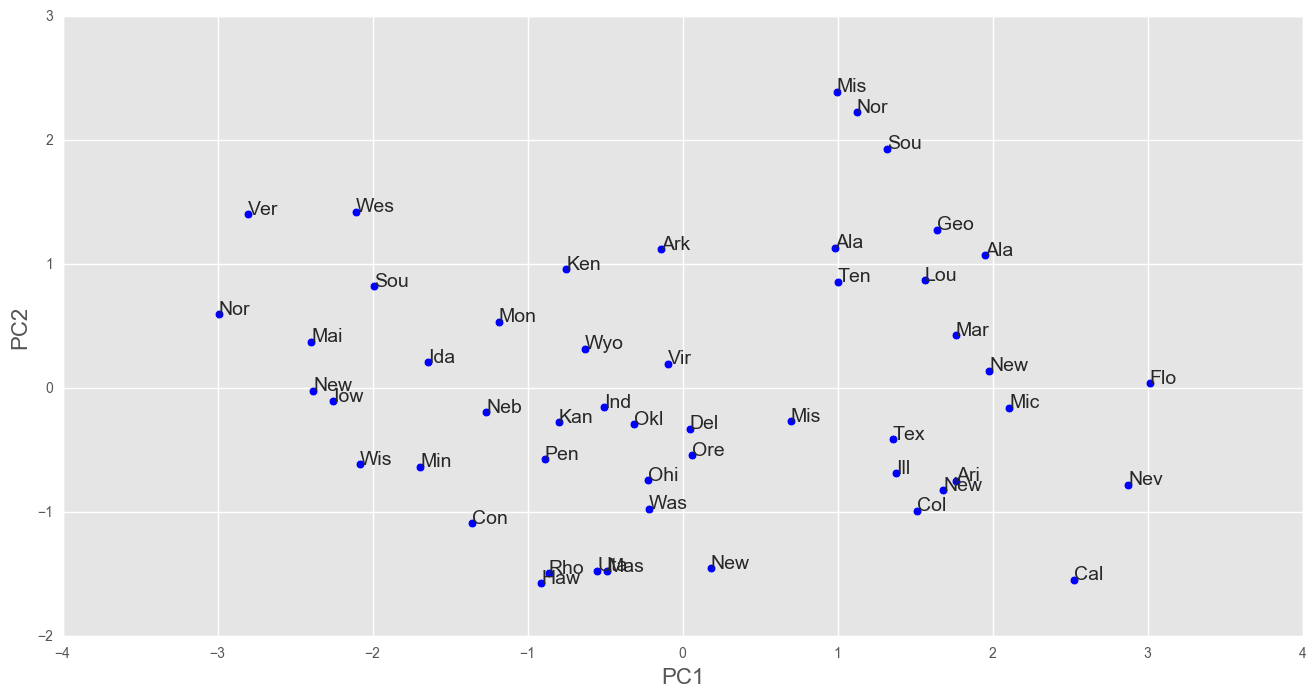

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.scatter(df_pca.PC1,df_pca.PC2, 
    s = 40,
    cmap = cm.get_cmap('rainbow'))
for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi[:3], (df_pca.iloc[i,0], df_pca.iloc[i,1]),fontsize=14)
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC2',fontsize=16)
plt.show()

#### 3. Perform hierarchical clustering on the dataset, calculate the cophenetic correlation and plot the resulting dendrogram

In [11]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print c
print len(coph_dists)
print coph_dists.mean()

0.697526563237
1225
9.0571324845


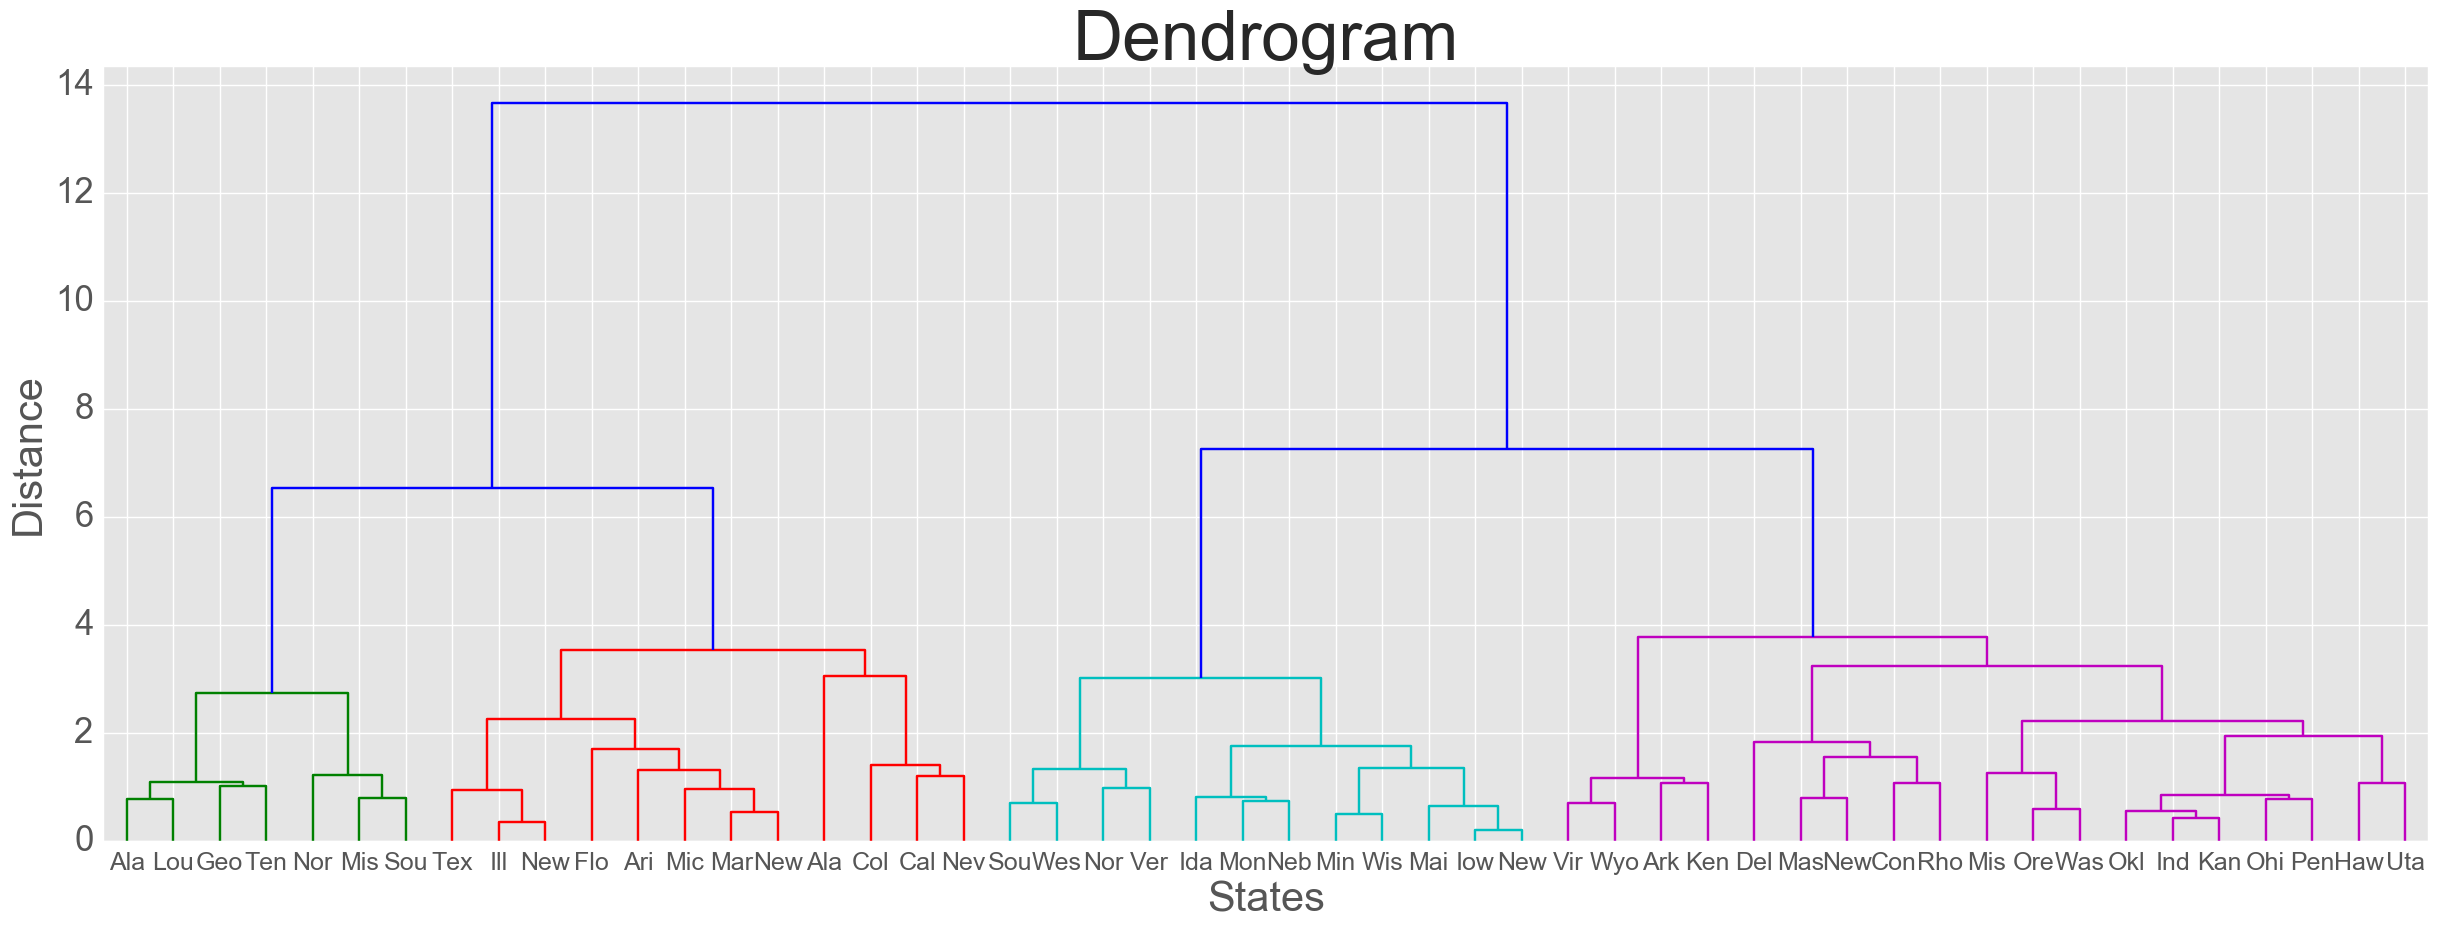

In [12]:
plt.figure(figsize=(30, 10))
plt.title('Dendrogram',fontsize=50)
plt.xlabel('States',fontsize=30)
plt.ylabel('Distance',fontsize=30)
dendrogram(
    Z,
    leaf_rotation=0.,  
    leaf_font_size=18.,
    labels = [state[:3] for state in df.States],
    color_threshold = 4
)
plt.yticks(fontsize=25.)
plt.show()


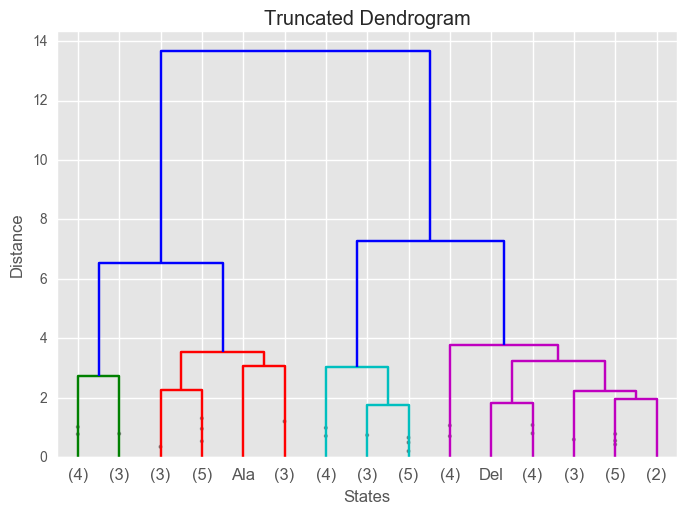

In [13]:
plt.title('Truncated Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=True,  
    leaf_rotation=0.,
    leaf_font_size=12.,
    show_contracted=True,  
    labels = [state[:3] for state in df.States],
    color_threshold = 4
)
plt.show()

{'Mississippi': 1, 'Oklahoma': 4, 'Delaware': 4, 'Minnesota': 3, 'Illinois': 2, 'Arkansas': 4, 'New Mexico': 2, 'Indiana': 4, 'Maryland': 2, 'Louisiana': 1, 'Idaho': 3, 'Wyoming': 4, 'Tennessee': 1, 'Arizona': 2, 'Iowa': 3, 'Michigan': 2, 'Kansas': 4, 'Utah': 4, 'Virginia': 4, 'Oregon': 4, 'Connecticut': 4, 'Montana': 3, 'California': 2, 'Massachusetts': 4, 'West Virginia': 3, 'South Carolina': 1, 'New Hampshire': 3, 'Wisconsin': 3, 'Vermont': 3, 'Georgia': 1, 'North Dakota': 3, 'Pennsylvania': 4, 'Florida': 2, 'Alaska': 2, 'Kentucky': 4, 'Hawaii': 4, 'Nebraska': 3, 'Missouri': 4, 'Ohio': 4, 'Alabama': 1, 'Rhode Island': 4, 'South Dakota': 3, 'Colorado': 2, 'New Jersey': 4, 'Washington': 4, 'North Carolina': 1, 'New York': 2, 'Texas': 2, 'Nevada': 2, 'Maine': 3}


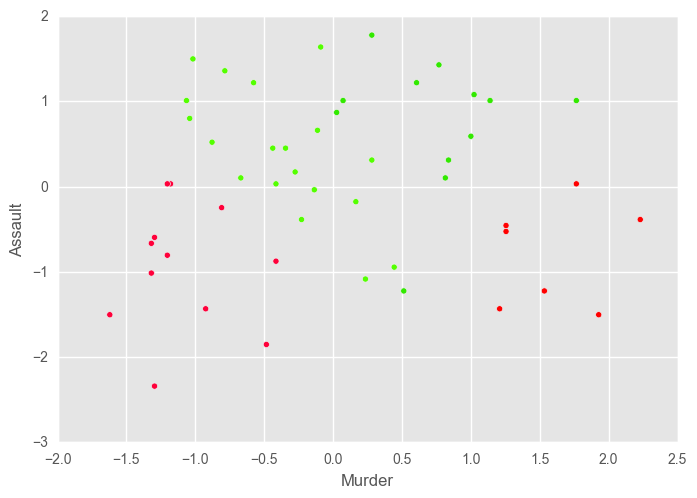

In [14]:
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
print dict(zip(df.States,clusters))

plt.scatter(X[:,0], X[:,2], c=clusters, cmap='prism')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()

#### 4. Perform hierarchical clustering on the first two principal components of the dataset, calculate the cophenetic correlation and plot the resulting dendrogram. Do you observe any differences compared to clustering on the whole dataset?

In [15]:
Z = linkage(X_pca[:,:2], 'ward')
c, coph_dists = cophenet(Z, pdist(X_pca))
print c
print len(coph_dists)
print coph_dists.mean()

0.719008123903
1225
8.90946031209


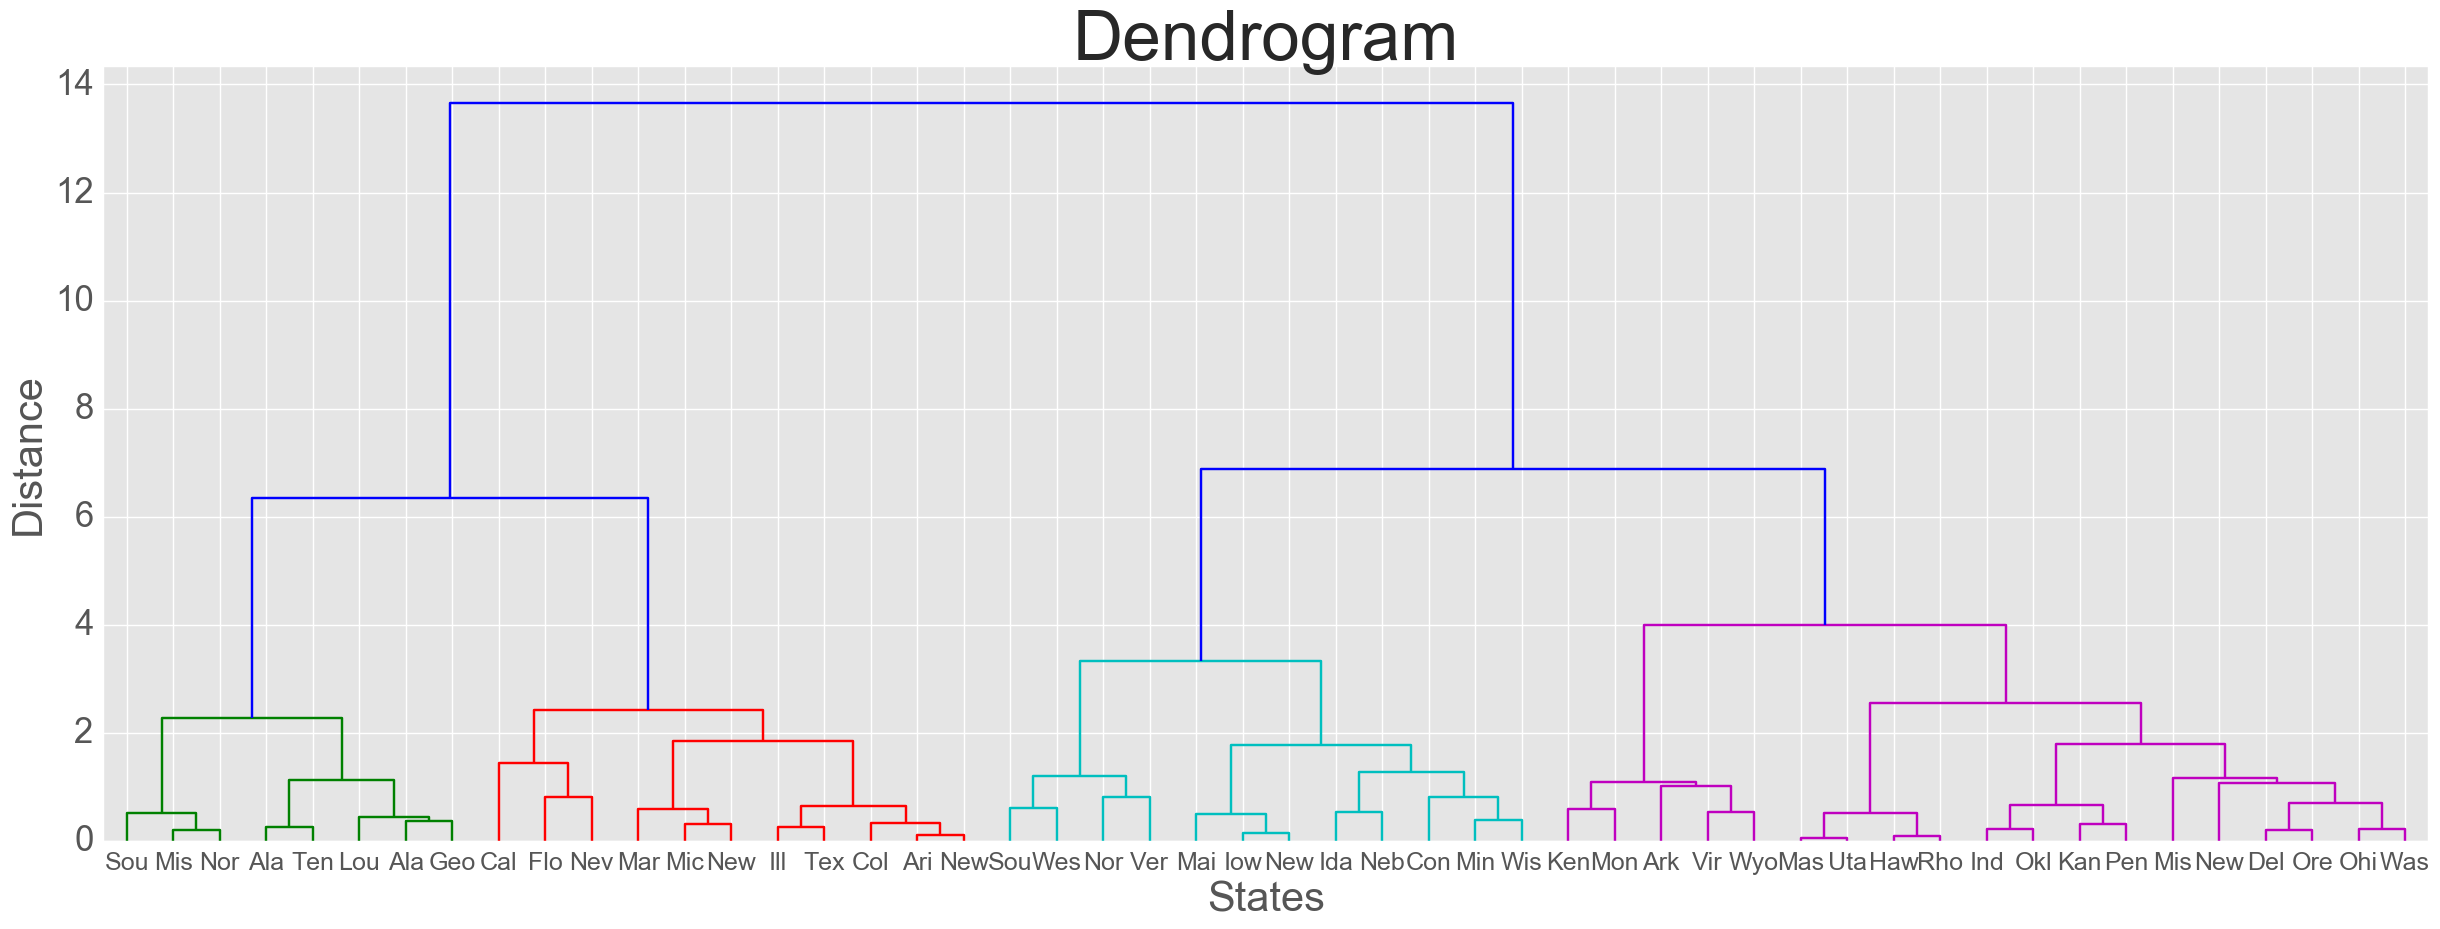

In [16]:
plt.figure(figsize=(30, 10))
plt.title('Dendrogram',fontsize=50)
plt.xlabel('States',fontsize=30)
plt.ylabel('Distance',fontsize=30)
dendrogram(
    Z,
    leaf_rotation=0.,  
    leaf_font_size=18.,
    labels = [state[:3] for state in df.States],
    color_threshold = 4
)
plt.yticks(fontsize=25.)
plt.show()



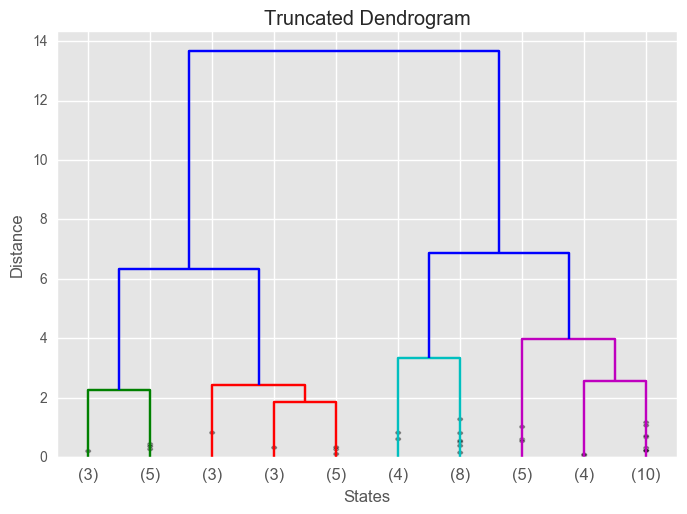

In [17]:
plt.title('Truncated Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=10,  
    show_leaf_counts=True,  
    leaf_rotation=0.,
    leaf_font_size=12.,
    show_contracted=True,  
    labels = [state[:3] for state in df.States],
    color_threshold = 4
)
plt.show()

#### 5. Now obtain cluster labels for the data points using the fcluster function. Vary the threshold. Produce a plot which shows the number of different clusters obtained versus the threshold value. 

In [18]:
cluster_num = []
for max_d in np.arange(0,10,0.1):
    clusters = fcluster(Z, max_d, criterion='distance')
    cluster_num.append((max_d,len(set(clusters))))

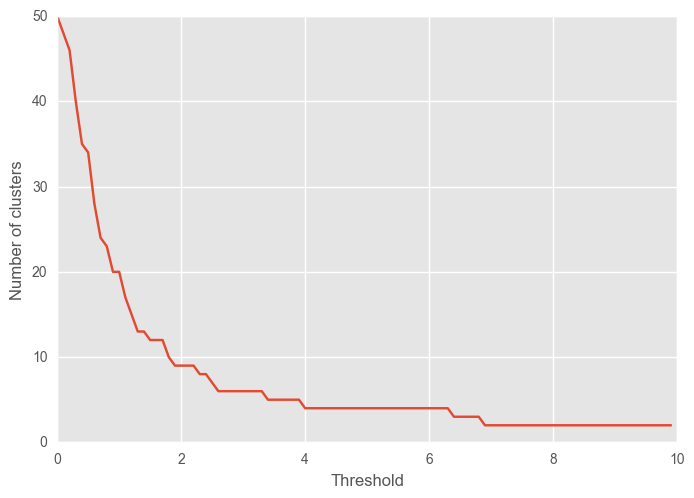

In [19]:
plt.plot(np.array(cluster_num)[:,0],np.array(cluster_num)[:,1])
plt.xlabel('Threshold')
plt.ylabel('Number of clusters')
plt.show()

#### 6. Set your threshold so that 4 different clusters are obtained. Produce a scatter plot of the data with the points coloured according to their cluster label.

In [20]:
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
print set(clusters)
print dict(zip(df.States,clusters))

set([1, 2, 3, 4])
{'Mississippi': 1, 'Oklahoma': 4, 'Delaware': 4, 'Minnesota': 3, 'Illinois': 2, 'Arkansas': 4, 'New Mexico': 2, 'Indiana': 4, 'Maryland': 2, 'Louisiana': 1, 'Idaho': 3, 'Wyoming': 4, 'Tennessee': 1, 'Arizona': 2, 'Iowa': 3, 'Michigan': 2, 'Kansas': 4, 'Utah': 4, 'Virginia': 4, 'Oregon': 4, 'Connecticut': 3, 'Montana': 4, 'California': 2, 'Massachusetts': 4, 'West Virginia': 3, 'South Carolina': 1, 'New Hampshire': 3, 'Wisconsin': 3, 'Vermont': 3, 'Georgia': 1, 'North Dakota': 3, 'Pennsylvania': 4, 'Florida': 2, 'Alaska': 1, 'Kentucky': 4, 'Hawaii': 4, 'Nebraska': 3, 'Missouri': 4, 'Ohio': 4, 'Alabama': 1, 'Rhode Island': 4, 'South Dakota': 3, 'Colorado': 2, 'New Jersey': 4, 'Washington': 4, 'North Carolina': 1, 'New York': 2, 'Texas': 2, 'Nevada': 2, 'Maine': 3}


#### Optional: Annotate the points in the scatter plot by the state names and identify the states belonging to the same cluster

In [21]:
df_pca['Cluster'] = clusters
df_pca.head()

,PC1,PC2,States,Cluster
0,0.985566,1.133392,Alabama,1
1,1.950138,1.073213,Alaska,1
2,1.763164,-0.745957,Arizona,2
3,-0.141420,1.119797,Arkansas,4
4,2.523980,-1.542934,California,2


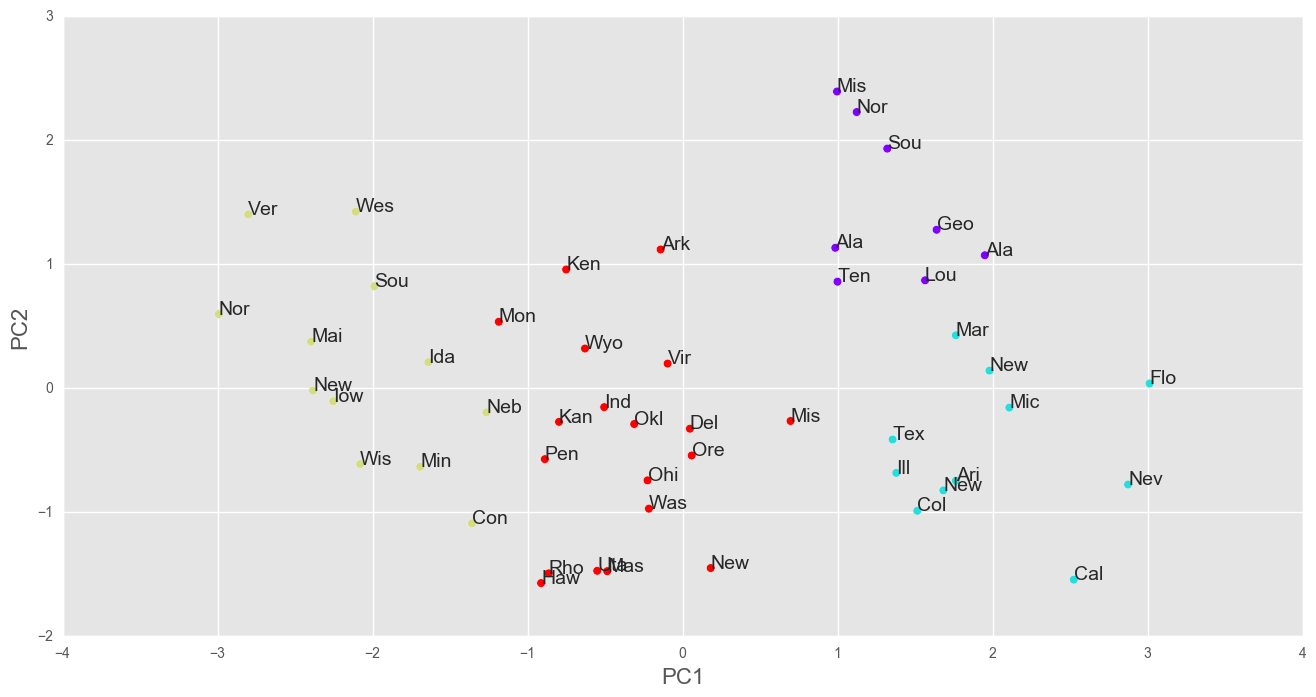

In [22]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.scatter(df_pca.PC1,df_pca.PC2, 
    s = 40,
    c = clusters,
    cmap = cm.get_cmap('rainbow'))
for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi[:3], (df_pca.iloc[i,0], df_pca.iloc[i,1]),fontsize=14)
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC2',fontsize=16)
plt.show()

In [23]:
pca.components_[:2,:].T

array([[ 0.53589947,  0.41818087],
       [ 0.58318363,  0.1879856 ],
       [ 0.27819087, -0.87280619],
       [ 0.54343209, -0.16731864]])